In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [4]:
df = pd.read_csv("glass.csv")

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.shape

(214, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Look at variable relation to Glass type

### RI and Na to glass type

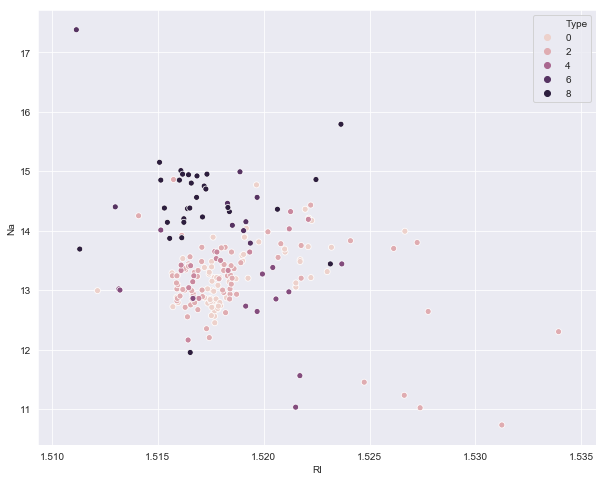

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='RI',y='Na',hue='Type',data=df)

 - Na is an important feature for glass type
 - Ri distribution does not provide much insight.

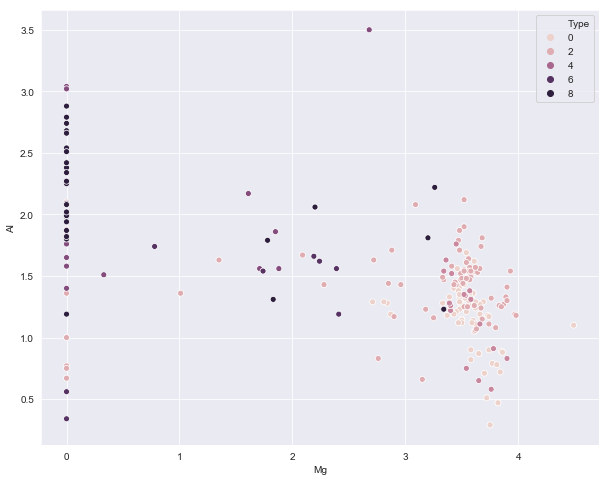

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Mg',y='Al',hue='Type',data=df)

- Higher Glass type have lower levels of mg

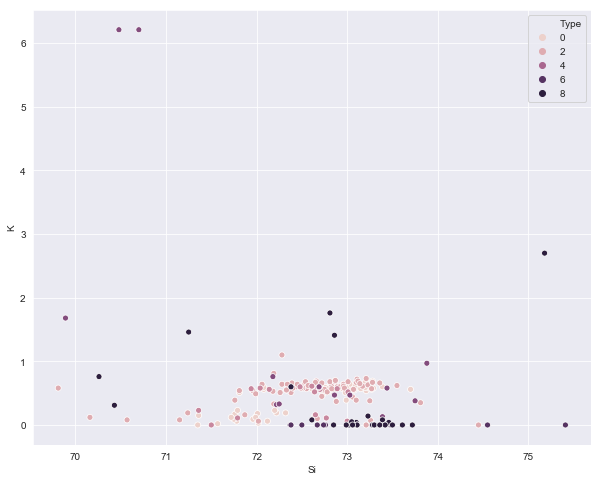

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Si',y='K',hue='Type',data=df)

- Si is of moderate importance in deciding glass type.
- All types of glass have lower values of K

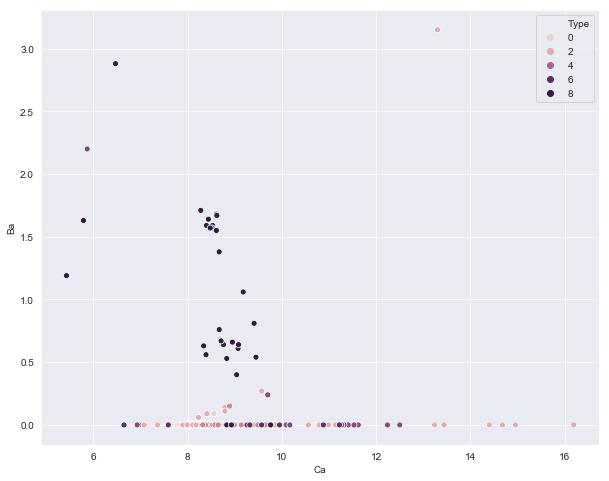

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ca',y='Ba',hue='Type',data=df)

- Higher glass type usually have higher values of Ba
- Ca helps moderately in identifying the glass type

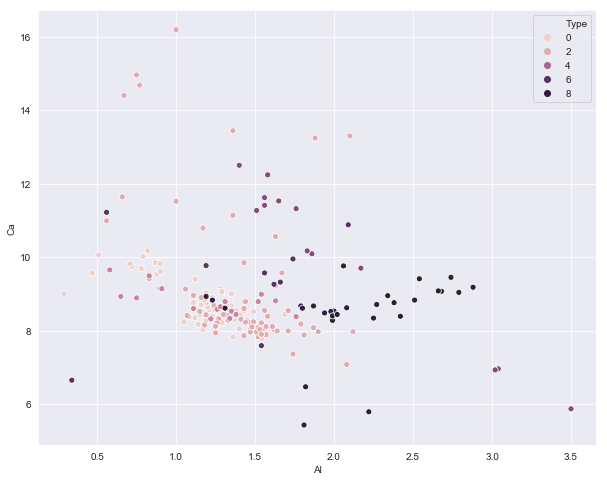

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Al',y='Ca',hue='Type',data=df)

- Al plays a vital role in identifying glass type.

## Checking Distribution of features of importance

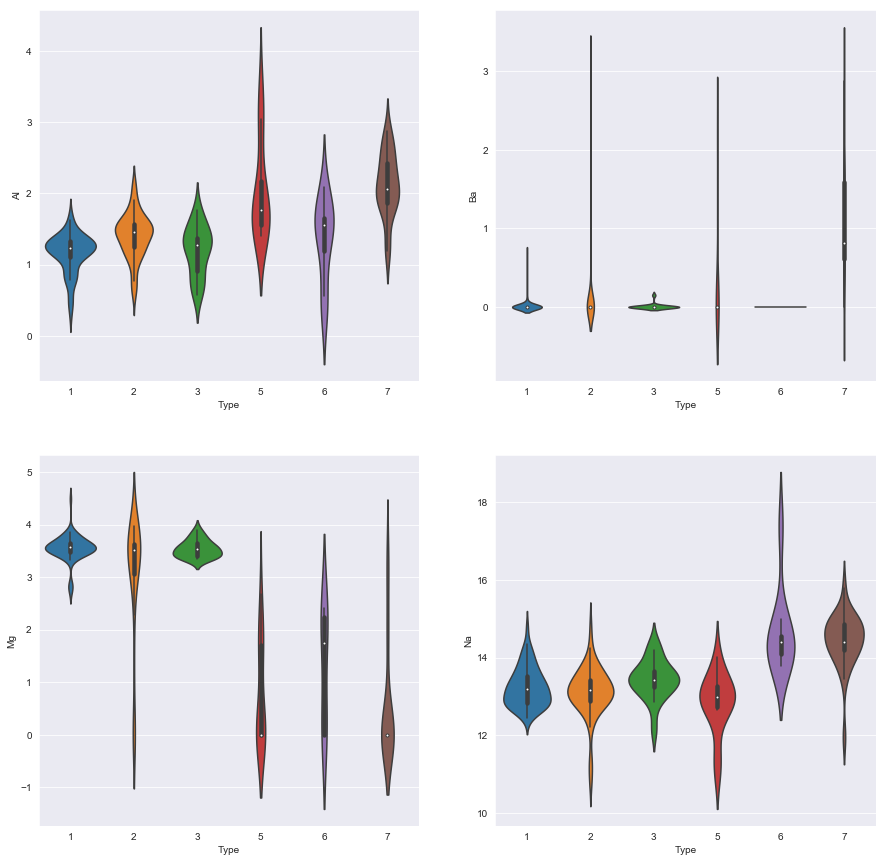

In [23]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.violinplot(x='Type',y='Al',data=df)

plt.subplot(2,2,2)
sns.violinplot(x='Type',y='Ba',data=df)

plt.subplot(2,2,3)
sns.violinplot(x='Type',y='Mg',data=df)

plt.subplot(2,2,4)
sns.violinplot(x='Type',y='Na',data=df)

**Not much insight into distribution if we look at violin plots**

## Confirming observation using correlation

In [21]:
corr = df.corr() 
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


**Confirmed Observations:**
1. Na, Al, Mg and Ba does helps in identifying glass types.
2. K, Ca does not provide much insight into glass types. 